<a href="https://colab.research.google.com/github/Chaitanyasuma/disaster-tweets/blob/chai_branch/MLM23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

training_data = pd.read_csv("train.csv")

In [3]:
training_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# EDA

In [4]:
from wordcloud import WordCloud

In [5]:
training_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [6]:
training_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
training_data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

# In the next few cells...
* remove stopwords and create word cloud
* check why https is in the word cloud

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

training_data_for_cloud = training_data[["text"]]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
training_data_for_cloud['tweet_without_stopwords'] = training_data_for_cloud['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-8-b2dde60837b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_for_cloud['tweet_without_stopwords'] = training_data_for_cloud['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [9]:
# creating the text variable
text1 = " ".join(text for text in training_data_for_cloud.text)

In [10]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

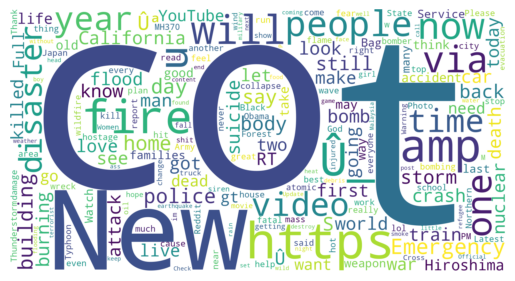

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
check_https = training_data_for_cloud[training_data_for_cloud['text'].str.contains("https")]

In [13]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

<IPython.core.display.Javascript object>

In [14]:
for i in range(1, 10):
  print(check_https.iloc[i]["text"])

Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z
Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ
#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
'By accident' they knew what was gon happen https://t.co/Ysxun5vCeh
Suffield Alberta Accident https://t.co/bPTmlF4P10
.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad
Aftershock https://t.co/xMWODFMtUI
Praise God that we have ministry that tells it like it is!!! #now #wdyouth #biblestudy https://t.co/UjK0e5GBcC
Aftershock https://t.co/jV8ppKhJY7


In [15]:
print(len(check_https))

407


# In the next few cells
* compute PoS tag frequencies and check if they are good features for logistic regression

In [17]:
import nltk

In [18]:
from nltk import word_tokenize, pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [19]:
all_tagged_texts = []
for sentence in training_data.text:
  text = word_tokenize(sentence)
  text2 = nltk.pos_tag(text)
  all_tagged_texts.append(text2)

In [20]:
training_data["tagged_text"] = all_tagged_texts

In [21]:
training_data.head()

,id,keyword,location,text,target,tagged_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[(Our, PRP$), (Deeds, NNS), (are, VBP), (the, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[(Forest, NNP), (fire, NN), (near, IN), (La, N..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[(All, DT), (residents, NNS), (asked, VBD), (t..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[(13,000, CD), (people, NNS), (receive, JJ), (..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[(Just, RB), (got, VBN), (sent, VBD), (this, D..."


In [22]:
def tagCounter(df_merged, sub_str, rowNbr):
    count = 0
    string = df_merged['tagged_text'][rowNbr] # a list of tuples with words and tags
    for every_tuple in string:
      # print(sub_str.lower(), every_tuple[1].lower())
      if sub_str.lower() == every_tuple[1].lower():
        count += 1
    return count

def df_syntax_count(df_merged):
    adverb_count = []
    noun_count = []
    adjective_count = []
    verb_count = []
    pronoun_count = []
    for i in df_merged.index:
        adverb = tagCounter(df_merged, "rb", i) + tagCounter(df_merged, "rbr", i) + tagCounter(df_merged, "rbt", i) + tagCounter(df_merged, "rn", i) + tagCounter(df_merged, "rp", i) + tagCounter(df_merged, "wrb", i) + tagCounter(df_merged, "nr", i)
        pronoun = tagCounter(df_merged, "pn", i) + tagCounter(df_merged, "pn$", i) + tagCounter(df_merged, "pp$", i) + tagCounter(df_merged, "pp$$", i) + tagCounter(df_merged, "ppl", i) + tagCounter(df_merged, "ppls", i) + tagCounter(df_merged, "pps", i) + tagCounter(df_merged, "ppo", i) + tagCounter(df_merged, "ppss", i)  + tagCounter(df_merged, "wpo",i) + tagCounter(df_merged, "wps", i) + tagCounter(df_merged, "wp$", i) + tagCounter(df_merged, "prp", i) + tagCounter(df_merged, "prp$", i)
        adjective = tagCounter(df_merged, "jj", i) + tagCounter(df_merged, "jjr", i) + tagCounter(df_merged, "jjs", i) + tagCounter(df_merged, "jjt", i)
        noun = tagCounter(df_merged, "nn", i) + tagCounter(df_merged, "np", i) + tagCounter(df_merged, "np$", i) + tagCounter(df_merged, "nps", i) + tagCounter(df_merged, "nps$", i) + tagCounter(df_merged, "nns", i) + tagCounter(df_merged, "nns$", i) + tagCounter(df_merged, "nn$", i)
        verb = tagCounter(df_merged, "vb", i) + tagCounter(df_merged, "vbd", i) + tagCounter(df_merged, "vbg", i) + tagCounter(df_merged, "vbn", i) + tagCounter(df_merged, "vbp", i) + tagCounter(df_merged, "vbz", i)

        noun_count.append(noun)
        adjective_count.append(adjective)
        pronoun_count.append(pronoun)
        verb_count.append(verb)
        adverb_count.append(adverb)

    df_merged['Adverb_count'] = adverb_count
    df_merged['Pronoun_count'] = pronoun_count
    df_merged['Noun_count'] = noun_count
    df_merged['Adjective_count'] = adjective_count
    df_merged['Verb_count'] = verb_count
df_syntax_count(training_data)

In [23]:
training_data.head()

,id,keyword,location,text,target,tagged_text,Adverb_count,Pronoun_count,Noun_count,Adjective_count,Verb_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[(Our, PRP$), (Deeds, NNS), (are, VBP), (the, ...",0,2,2,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[(Forest, NNP), (fire, NN), (near, IN), (La, N...",0,0,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[(All, DT), (residents, NNS), (asked, VBD), (t...",0,0,7,1,7
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[(13,000, CD), (people, NNS), (receive, JJ), (...",0,0,3,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[(Just, RB), (got, VBN), (sent, VBD), (this, D...",1,0,4,0,3


In [24]:
train_classifier_1 = training_data[['target','Adverb_count','Pronoun_count', 'Noun_count','Adjective_count','Verb_count']]

   target  Adverb_count  Pronoun_count  Noun_count  Adjective_count  \
0       1             0              2           2                0   
1       1             0              0           1                0   
2       1             0              0           7                1   
3       1             0              0           3                1   
4       1             1              0           4                0   

   Verb_count  
0           1  
1           0  
2           7  
3           1  
4           3  
Accuracy of logistic regression classifier on test set: 0.67
[[1004  314]
 [ 449  517]]


<ipython-input-25-005a8d74710f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-25-005a8d74710f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


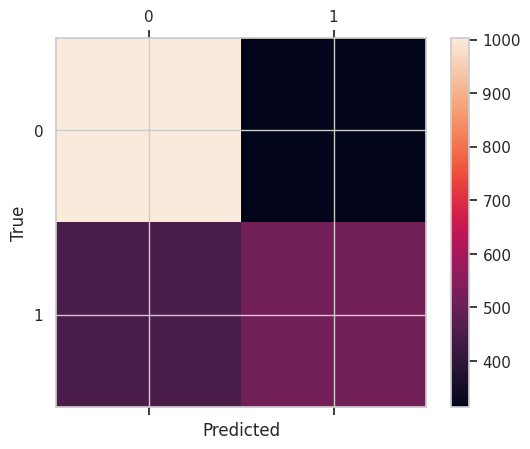

In [25]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def confusionMatrix(y_test, predictions):
    labels = [0, 1]
    cm = confusion_matrix(y_test, predictions, labels=labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def Classify(df_samples):
    print(df_samples.head())
    y = df_samples['target']
    X = df_samples.drop(['target'], axis = 1) # only 5 features in X
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # with only random_state=0
    logreg = LogisticRegression(solver='saga', max_iter=5000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    confusionMatrix(y_test, y_pred)

Classify(train_classifier_1)

# In the next few cells..
UMAP Visualization

In [26]:
!pip install 'umap-learn==0.3.10'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38861 sha256=71823f68e149048e29b0c676cbcb8714e245b7d77849aefeb857cafafd9ec580
  Stored in directory: /root/.cache/pip/wheels/fa/7c/c0/f6b5434510bef2e044d9c2e81f2f204c85b1412e85a90a16aa
Successfully built umap-learn


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import umap.umap_ as umap
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Some plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

training_data_2 = pd.read_csv("train.csv")

In [28]:
training_data.shape

(7613, 11)

In [ ]:
data_for_viz = training_data_2[['text', 'target']]

# print(list(training_data_2.text))
# print(type(list(training_data_2.text)))
# print(training_data_2.text.to_numpy().shape)

In [30]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(list(training_data_2.iloc[:300].text))

# labels = list(training_data_2.iloc[:300].target)

labels = list(training_data_2.target)[:300]

import umap

print(type(docs), " blah ", docs.shape)

obj = umap.UMAP()
reduced_docs = obj.fit_transform(docs)

<class 'scipy.sparse._csr.csr_matrix'>  blah  (300, 1646)


In [31]:
labels_0 = reduced_docs[np.array(labels) == 0]
labels_1 = reduced_docs[np.array(labels) == 1]

In [32]:
temp = reduced_docs[:5]
temp[np.array([True, True, False, False, True])]
(np.array(labels) == 0).shape

(300,)

In [33]:
print(type(reduced_docs))

<class 'numpy.ndarray'>


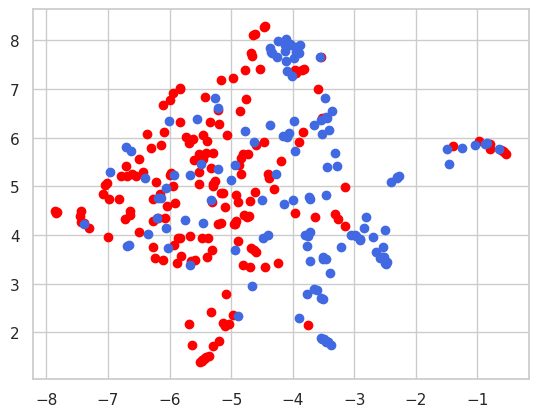

In [34]:
plt.scatter(x=labels_0[:,0], y=labels_0[:,1], color='red')
plt.scatter(x=labels_1[:,0], y=labels_1[:,1], color='royalblue')
plt.show()

# In the next few cells

We determined that linear Regression won't work.

- we use Word2Vec or GloVe and run UMAP again

# In the next few cells

Run a pre-trained DistilBert model

In [ ]:
!pip install torch
!pip install transformers


In [36]:
from huggingface_hub import notebook_login

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [39]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [51]:
training_data_hf = pd.read_csv("train.csv")
training_data_hf.head()

test_data_hf = pd.read_csv("test.csv")

In [52]:
texts = training_data_hf['text']
labels = training_data_hf['target']

test_texts = test_data_hf['text']

print(type(texts))

<class 'pandas.core.series.Series'>


In [ ]:
texts_list = texts.tolist()
labels_list = labels.tolist()
test_texts_list = test_texts.tolist()
print(texts_list)

In [ ]:
print(labels_list)

In [55]:
train_texts, test_texts, train_labels, test_labels = train_test_split(texts_list, labels_list, test_size=0.2, random_state=42)

In [56]:
# Tokenize the texts using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [59]:
# Convert labels to PyTorch tensors
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

print(train_labels.size)

<built-in method size of Tensor object at 0x7f62d1ce3600>


<ipython-input-59-de81d7d59afe>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels)
<ipython-input-59-de81d7d59afe>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels)


In [60]:
train_dataset = TensorDataset(torch.tensor(train_encodings.input_ids),
                              torch.tensor(train_encodings.attention_mask),
                              train_labels)


In [61]:
test_dataset = TensorDataset(torch.tensor(test_encodings.input_ids),
                             torch.tensor(test_encodings.attention_mask),
                             test_labels)


In [62]:
# Load pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [64]:
# Set up optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Training loop
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

In [ ]:
# Evaluation
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())

In [ ]:
# Print classification report
print(classification_report(test_labels.numpy(), predictions))

In [ ]:
pip install -U "tensorflow-text==2.13.*"

In [ ]:
pip install "tf-models-official==2.13.*"

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
# import BERT tokenization

!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py


In [ ]:
# import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
training_data = pd.read_csv("train.csv")

label = preprocessing.LabelEncoder()
y = label.fit_transform(training_data['target'])
y = to_categorical(y)
print(y[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)